This file visualizes the synthetic network results. 

Note this was run with Python 3.6.3, numpy 1.19.5, networkx 2.5.1, matplotlib 3.3.4, seaborn 0.11.2

In [1]:
import sys
import os
sys.path.append(os.path.join('..','Methods','stacking_model'))
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import generate_helper
import viz_helper
import csv
import pickle
from matplotlib.lines import Line2D
import seaborn as sns
full_color = 'chocolate'
struc_color = 'olivedrab'
attr_color = 'cadetblue'
FONT_SIZE = 14.2

import matplotlib.font_manager as font_manager
font_dir = ['../../Helvetica']
for font in font_manager.findSystemFonts(font_dir):
    font_manager.fontManager.addfont(font)
plt.rcParams['font.family'] = 'Helvetica'

if not os.path.exists('Figures'):
    os.mkdir('Figures')

In [2]:
# N - number of stops along rho per model
# M - number of networks at each value of rho
# folds - number of folds link prediction was run across for each network 
# res_folder - results folder

# In the results:
# 0 - result with stacking model, topological
# 1 - result with stacking model, attributes
# 2 - result with stacking model, full

def plot_results_all(N,M,folds,res_folder,struc_stops,attr_stops,full_stops,tm,title,net1,net2,comp):
            
    struc_res_obj = np.zeros((N,M,folds))
    attr_res_obj = np.zeros((N,M,folds))
    full_res_obj = np.zeros((N,M,folds))
    
    assert len(struc_stops) == N
    assert len(attr_stops) == N
    assert len(full_stops) == N
    
    # For displaying every result 
    every_struc_alpha = []
    for x in struc_stops:
        every_struc_alpha += M*[x]
    every_attr_alpha = []
    for x in attr_stops:
        every_attr_alpha += M*[x]
    every_full_alpha = []
    for x in full_stops:
        every_full_alpha += M*[x]
    
    for s in range(0,N):#)-2):
        for i in range(0,M):
            
            # structure
            auc_curr = f'{res_folder}/stacking_auc_n{s}_m{i}_struc.csv'
            with open(auc_curr,'r') as file_obj:
                sim_reader = csv.reader(file_obj)
                fold = 0 
                for row in sim_reader:
                    struc_res_obj[s][i][fold] = row[0]
                    fold +=1
                assert fold == folds, "not enough results for number of folds provided"
            
            # attribute
            auc_curr = f'{res_folder}/stacking_auc_n{s}_m{i}_attr.csv'
            with open(auc_curr,'r') as file_obj:
                sim_reader = csv.reader(file_obj)
                fold = 0 
                for row in sim_reader:
                    attr_res_obj[s][i][fold] = row[1]
                    fold +=1
                assert fold == folds, "not enough results for number of folds provided"
        
            # full
            auc_curr = f'{res_folder}/stacking_auc_n{s}_m{i}_full.csv'
            with open(auc_curr,'r') as file_obj:
                sim_reader = csv.reader(file_obj)
                fold = 0 
                for row in sim_reader:
                    full_res_obj[s][i][fold] = row[2]
                    fold +=1
                assert fold == folds, "not enough results for number of folds provided"
            
    every_struc_res = []
    for x in range(0,N):
        for y in range(0,M):
            every_struc_res.append(np.mean(struc_res_obj[x][y][:])) # averaging across folds for a network
            
    every_attr_res = []
    for x in range(0,N):
        for y in range(0,M):
            every_attr_res.append(np.mean(attr_res_obj[x][y][:])) # averaging across folds for a network
    
    every_full_res = []
    for x in range(0,N):
        for y in range(0,M):
            every_full_res.append(np.mean(full_res_obj[x][y][:])) # averaging across folds for a network
            
            
    avg_struc_res = []
    for x in range(0,N):
        temp_res = []
        for y in range(0,M):
            temp_res.append(np.mean(struc_res_obj[x][y][:])) # averaging across folds for a network
        avg_struc_res.append(np.mean(temp_res)) # averaging across reps 
            
    avg_attr_res = []
    for x in range(0,N):
        temp_res = []
        for y in range(0,M):
            temp_res.append(np.mean(attr_res_obj[x][y][:])) # averaging across folds for a network
        avg_attr_res.append(np.mean(temp_res)) # averaging across reps 
    
    avg_full_res = []
    for x in range(0,N):
        temp_res = []
        for y in range(0,M):
            temp_res.append(np.mean(full_res_obj[x][y][:])) # averaging across folds for a network
        avg_full_res.append(np.mean(temp_res)) # averaging across reps
        
    # theoretical AUC maximum
    tm_as = []
    tm_vals = []
    tm_vals1 = []
    tm_vals2 = []
    with open(tm,'r') as file_obj:
        sim_reader = csv.reader(file_obj)
        next(sim_reader)
        for row in sim_reader:
            tm_as.append(float(row[0]))
            tm_vals.append(float(row[1]))
            if comp:
                tm_vals1.append(float(row[2]))
                tm_vals2.append(float(row[3]))
    
    # SCATTER PLOT ALL THE RESULTS (AVERAGED ACROSS FOLDS)
    s = np.full(((N)*M,1),40)
    plt.scatter(every_struc_alpha, every_struc_res, marker="1", s=s, color=struc_color, alpha=0.5)
    plt.scatter(every_attr_alpha, every_attr_res, marker="2", s=s, color=attr_color, alpha=0.5)
    plt.scatter(every_full_alpha, every_full_res, marker=".", s=s, color=full_color, alpha=0.5)
    
    # LINE PLOTS CONNECTING AVERAGES (AVERAGED ACROSS ALL RESULTS FOR EACH ALPHA)
    plt.plot(struc_stops, avg_struc_res, linewidth=3, color=struc_color)
    plt.plot(attr_stops, avg_attr_res, linewidth=3, color=attr_color)
    plt.plot(full_stops, avg_full_res, linewidth=3, color=full_color)
    
    # Gray out the area about the theoreticaL AUC maximum 
    plt.fill_between(tm_as,tm_vals,[1]*len(tm_vals),facecolor=(0,0,0,0.3),interpolate=True)
    
    # Scatter the theoretical max values
    s = np.full((len(tm_as),1),40)
    plt.scatter(tm_as, tm_vals, marker="^", s=s, color='black')

    plt.ylabel("ROC-AUC", fontsize=FONT_SIZE)
    plt.xlabel(r"$\rho$",fontsize=FONT_SIZE)
    plt.xlim([-0.02,1.02])
    plt.ylim([0.4,1])
    plt.xticks(fontsize = FONT_SIZE) 
    plt.yticks(fontsize = FONT_SIZE)
    plt.hlines(0.5,-0.02,1.02,linestyles='dashed',linewidths=1.2,color='k')
    
    # Partial curves
    if comp:
        plt.scatter(tm_as, tm_vals1, marker="^", s=s, color=struc_color, edgecolors='black',zorder=10)
        plt.scatter(tm_as, tm_vals2, marker="^", s=s, color=attr_color, edgecolors='black',zorder=10)

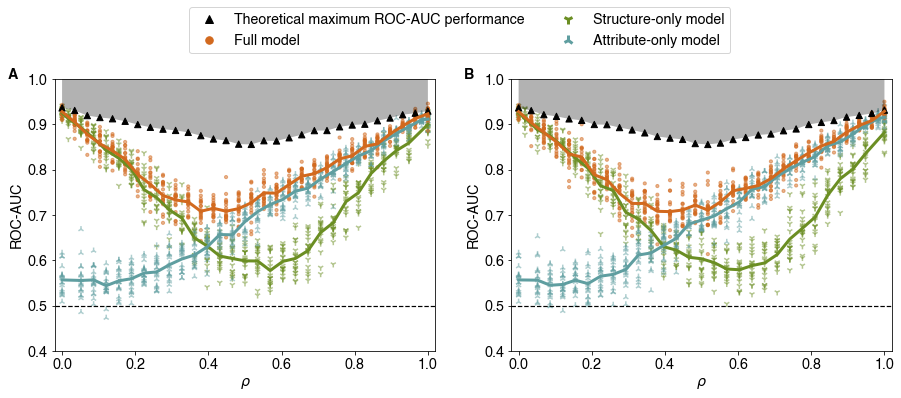

In [3]:
fig, ha = plt.subplots(1,2,figsize=(15, 5))

# Assortative networks (no extra training links included)

plt.subplot(1, 2, 1)
N = 30 # number of stops along alpha to test at
M = 20 # network iterations per alpha
folds = 5
net_folder = 'Synth_Nets_Directed_Assortative'
res_folder = 'Results_Synthetic_Directed_Assortative'
net1 = 'SBM network'
net2 = 'RGG network, assortative'
with open(os.path.join(net_folder,'struc_model_stops.pickle'), 'rb') as handle:
    struc_model_stops = pickle.load(handle)
with open(os.path.join(net_folder,'full_model_stops.pickle'), 'rb') as handle:
    full_model_stops = pickle.load(handle)
with open(os.path.join(net_folder,'attr_model_stops.pickle'), 'rb') as handle:
    attr_model_stops = pickle.load(handle)
tm = os.path.join(net_folder,'theoretical_auc_max.csv')
comp = False
plot_results_all(N,M,folds,res_folder,struc_model_stops,attr_model_stops,full_model_stops,tm,'Assortative',net1,net2,comp)
plt.text(-0.15, 1, 'A', size=FONT_SIZE, weight='bold')

# Disassortative networks (no extra training links included)
plt.subplot(1, 2, 2)

N = 30 # number of stops along alpha to test at
M = 20 # network iterations per alpha
folds = 5
net_folder = 'Synth_Nets_Directed_Disassortative'
res_folder = 'Results_Synthetic_Directed_Disassortative'
net1 = 'SBM network'
net2 = 'RGG network, disassortative'
with open(os.path.join(net_folder,'struc_model_stops.pickle'), 'rb') as handle:
    struc_model_stops = pickle.load(handle)
with open(os.path.join(net_folder,'full_model_stops.pickle'), 'rb') as handle:
    full_model_stops = pickle.load(handle)
with open(os.path.join(net_folder,'attr_model_stops.pickle'), 'rb') as handle:
    attr_model_stops = pickle.load(handle)
tm = os.path.join(net_folder,'theoretical_auc_max.csv')
comp = False
plot_results_all(N,M,folds,res_folder,struc_model_stops,attr_model_stops,full_model_stops,tm,'Disassortative',net1,net2,comp)
plt.text(-0.15, 1, 'B', size=FONT_SIZE, weight='bold')

# Custom legend
legend_elements = [Line2D([0], [0], linewidth=0, color='k', marker='^', markersize=8, label='Theoretical maximum ROC-AUC performance'),
                   Line2D([0], [0], linewidth=0, marker='.', markersize=15,color=full_color, label='Full model'),
                   Line2D([0], [0], linewidth=0, marker='1', markersize=10,markeredgewidth=3,color=struc_color, label='Structure-only model'),
                   Line2D([0], [0], linewidth=0, marker='2', markersize=10,markeredgewidth=3,color=attr_color, label='Attribute-only model')]

fig.legend(handles=legend_elements, loc = 'upper center', bbox_to_anchor=(0.5,1.1), ncol=2, fontsize=FONT_SIZE)

plt.savefig(f'Figures/Synthetic_Directed.png',bbox_inches='tight',dpi=1000)
plt.show()

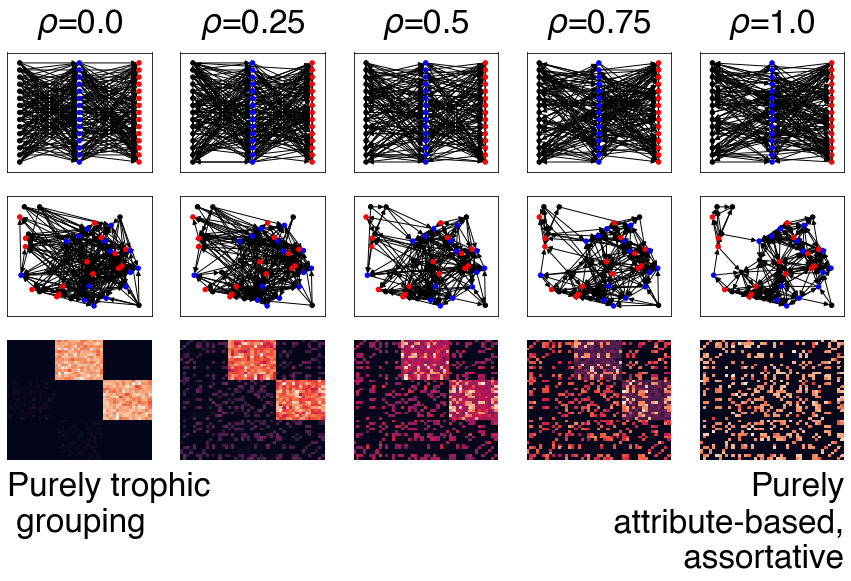

In [4]:
# Assortative network -- Visualize a 2D example for demonstration

fig, axes = plt.subplots(3,5,figsize=(15, 7.5))

# Network parameters
NUM_NODES = 45
REC_PROP = 0.02
BLOCKZ = [15,15,15] # group sizes
PROBZ = [[0,0.544,0],[0.544,0,0.544],[0,0.544,0]] # edge probabilities
def step_fn_simple_assortative(distance):
    if distance < 0.3431:
        prob = 1
    else:
        prob = 0
    return prob

# random attributes
nodes = range(0,NUM_NODES)
attr = generate_helper.generate_random_attributes(nodes,0,2,[[0,1],[0,1]]) # just 2 numeric attributes 

alphas = [0,0.25,0.5,0.75,1]
mixed_nets = []
for i in range(0,5):
    net = generate_helper.mixed_network_directed(nodes,None,None,None,BLOCKZ,PROBZ,step_fn_simple_assortative,\
                                                 REC_PROP,alphas[i],attr)
    mixed_nets.append(net)
    viz_helper.draw_3groups_graph(net, axes.flat[i],fr"$\rho$={i*0.25}",FONT_SIZE*2*1.17,20)
for i in range(5,10):
    net = mixed_nets[i-5]
    viz_helper.draw_pos_graph(net, attr, axes.flat[i])
    
for i in range(10,15):
    probs, _ = generate_helper.numerical_probabilities(100,nodes,None,None,None,BLOCKZ,PROBZ,step_fn_simple_assortative,\
                                                 REC_PROP,alphas[i-10],attr,0)
    sns.heatmap(probs, ax=axes.flat[i], cbar=False)
    if i == 10:
        axes.flat[i].set_xlabel("Purely trophic\n grouping", fontsize=FONT_SIZE*2*1.17, loc = "left")
    if i == 14:
        axes.flat[i].set_xlabel("Purely\n attribute-based,\n assortative", fontsize=FONT_SIZE*2*1.17, loc = "right")
    axes.flat[i].tick_params(left=False, bottom=False)
    axes.flat[i].set_xticklabels([])
    axes.flat[i].set_yticklabels([])

plt.savefig(f'Figures/Network_Sweep_Assortative_AUC.png',bbox_inches='tight',dpi=1000)
plt.show()

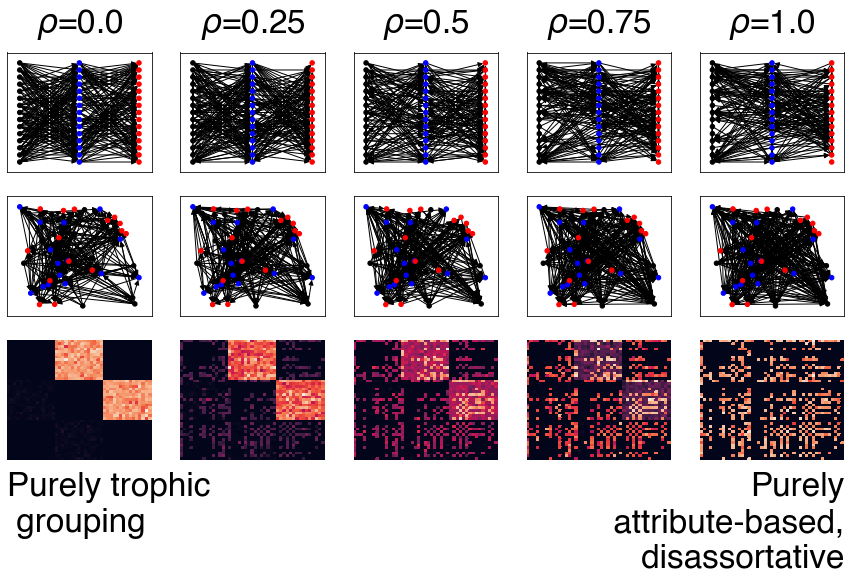

In [5]:
# Disassortative network -- Visualize a 2D example for demonstration

fig, axes = plt.subplots(3,5,figsize=(15, 7.5))

# Network parameters
NUM_NODES = 45
REC_PROP = 0.02
BLOCKZ = [15,15,15] # group sizes
PROBZ = [[0,0.544,0],[0.544,0,0.544],[0,0.544,0]] # edge probabilities
def step_fn_simple_disassortative(distance):
    if distance > 0.7373:
        prob = 1
    else:
        prob = 0
    return prob

# random attributes
nodes = range(0,NUM_NODES)
attr = generate_helper.generate_random_attributes(nodes,0,2,[[0,1],[0,1]]) # just 2 numeric attributes 

alphas = [0,0.25,0.5,0.75,1]
mixed_nets = []
for i in range(0,5):
    net = generate_helper.mixed_network_directed(nodes,None,None,None,BLOCKZ,PROBZ,step_fn_simple_disassortative,\
                                                 REC_PROP,alphas[i],attr)
    mixed_nets.append(net)
    viz_helper.draw_3groups_graph(net, axes.flat[i],fr"$\rho$={i*0.25}",FONT_SIZE*2*1.17,20)
for i in range(5,10):
    net = mixed_nets[i-5]
    viz_helper.draw_pos_graph(net, attr, axes.flat[i])
for i in range(10,15):
    probs, _ = generate_helper.numerical_probabilities(100,nodes,None,None,None,BLOCKZ,PROBZ,step_fn_simple_disassortative,\
                                                 REC_PROP,alphas[i-10],attr,0)
    sns.heatmap(probs, ax=axes.flat[i], cbar=False)
    if i == 10:
        axes.flat[i].set_xlabel("Purely trophic\n grouping", fontsize=FONT_SIZE*2*1.17, loc = "left")
    if i == 14:
        axes.flat[i].set_xlabel("Purely\n attribute-based,\n disassortative", fontsize=FONT_SIZE*2*1.17, loc = "right")
    axes.flat[i].tick_params(left=False, bottom=False)
    axes.flat[i].set_xticklabels([])
    axes.flat[i].set_yticklabels([])

plt.savefig(f'Figures/Network_Sweep_Disassortative_AUC.png',bbox_inches='tight',dpi=1000)
plt.show()